step: 0  value: [13.48232426 13.99837464 12.19829338]  policy: [0.5, 0.5, 0.5]
step: 1  value: [20.24405125 20.         20.23184869]  policy: [1, 0, 1]
step: 2  value: [25.01947209 25.14928602 24.76849849]  policy: [1, 1, 1]


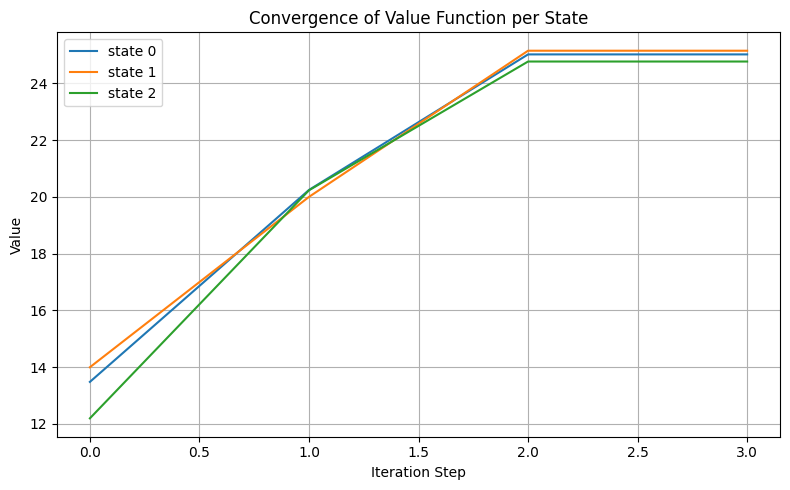

In [1]:
# 各種モジュールのインポート
import numpy as np
import copy
import matplotlib.pyplot as plt

# MDP の設定
p = [0.8, 0.5, 1.0]

# 割引率の設定
gamma = 0.95

# 報酬期待値の設定
r = np.zeros((3, 3, 2))
r[0, 1, 0] = 1.0
r[0, 2, 0] = 2.0
r[0, 0, 1] = 0.0
r[1, 0, 0] = 1.0
r[1, 2, 0] = 2.0
r[1, 1, 1] = 1.0
r[2, 0, 0] = 1.0
r[2, 1, 0] = 0.0
r[2, 2, 1] = -1.0

# 価値関数の初期化
v = [0, 0, 0]
v_prev = copy.copy(v)

# 行動価値関数の初期化
q = np.zeros((3, 2))

# 方策分布の初期化
pi = [0.5, 0.5, 0.5]

# 収束追跡用リスト
v_list = []

# 方策評価関数の定義
def policy_estimator(pi, p, r, gamma):
    R = [0, 0, 0]
    P = np.zeros((3, 3))

    for i in range(3):
        # 状態遷移行列の計算
        P[i, i] = 1 - pi[i]
        P[i, (i + 1) % 3] = p[i] * pi[i]
        P[i, (i + 2) % 3] = (1 - p[i]) * pi[i]

        # 報酬ベクトルの計算
        R[i] = pi[i] * (p[i] * r[i, (i + 1) % 3, 0] +
                        (1 - p[i]) * r[i, (i + 2) % 3, 0]) + \
               (1 - pi[i]) * r[i, i, 1]

    # ベルマン方程式を解く
    A = np.eye(3) - gamma * P
    B = np.linalg.inv(A)
    v_sol = np.dot(B, R)

    return v_sol

# 方策反復法の実行
for step in range(100):
    v = policy_estimator(pi, p, r, gamma)
    v_list.append(copy.copy(v))  # 各ステップのvを保存

    if np.min(v - v_prev) <= 0:
        break

    print('step:', step, ' value:', v, ' policy:', pi)

    for i in range(3):
        q[i, 0] = p[i] * (r[i, (i + 1) % 3, 0] + gamma * v[(i + 1) % 3]) + \
                  (1 - p[i]) * (r[i, (i + 2) % 3, 0] + gamma * v[(i + 2) % 3])
        q[i, 1] = r[i, i, 1] + gamma * v[i]

        if q[i, 0] > q[i, 1]:
            pi[i] = 1
        elif q[i, 0] == q[i, 1]:
            pi[i] = 0.5
        else:
            pi[i] = 0

    v_prev = copy.copy(v)

# --------------------------
# グラフの描画：収束の様子
# --------------------------
v_array = np.array(v_list)
plt.figure(figsize=(8, 5))
for i in range(3):
    plt.plot(v_array[:, i], label=f"state {i}")
plt.xlabel("Iteration Step")
plt.ylabel("Value")
plt.title("Convergence of Value Function per State")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
